### Import Libraries
let's import the necessary libraries, including scikit-learn for the KNN algorithm and pandas for data manipulation.



In [39]:
import pandas as  pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

 ### Load the Iris Dataset

In [21]:
# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

In [16]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

### Explore the Dataset
You can take a quick look at the dataset to understand its structure.

In [68]:
# Create a DataFrame
iris_df = pd.DataFrame(data, columns = iris.feature_names)
iris_df['target'] = target
# Display the first few rows of the dataset
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Split the Data into Training and Testing Sets
Split the dataset into training and testing sets to evaluate the model's performance.

In [27]:
X_train, X_test, y_train, y_test = train_test_split (data, target, test_size= 0.2, random_state = 42)

###  Visualize Data Before Predictions

In [58]:

# Create a DataFrame for visualization
iris_df_visualize = pd.DataFrame(X_train, columns=iris.feature_names)
iris_df_visualize['target'] = y_train


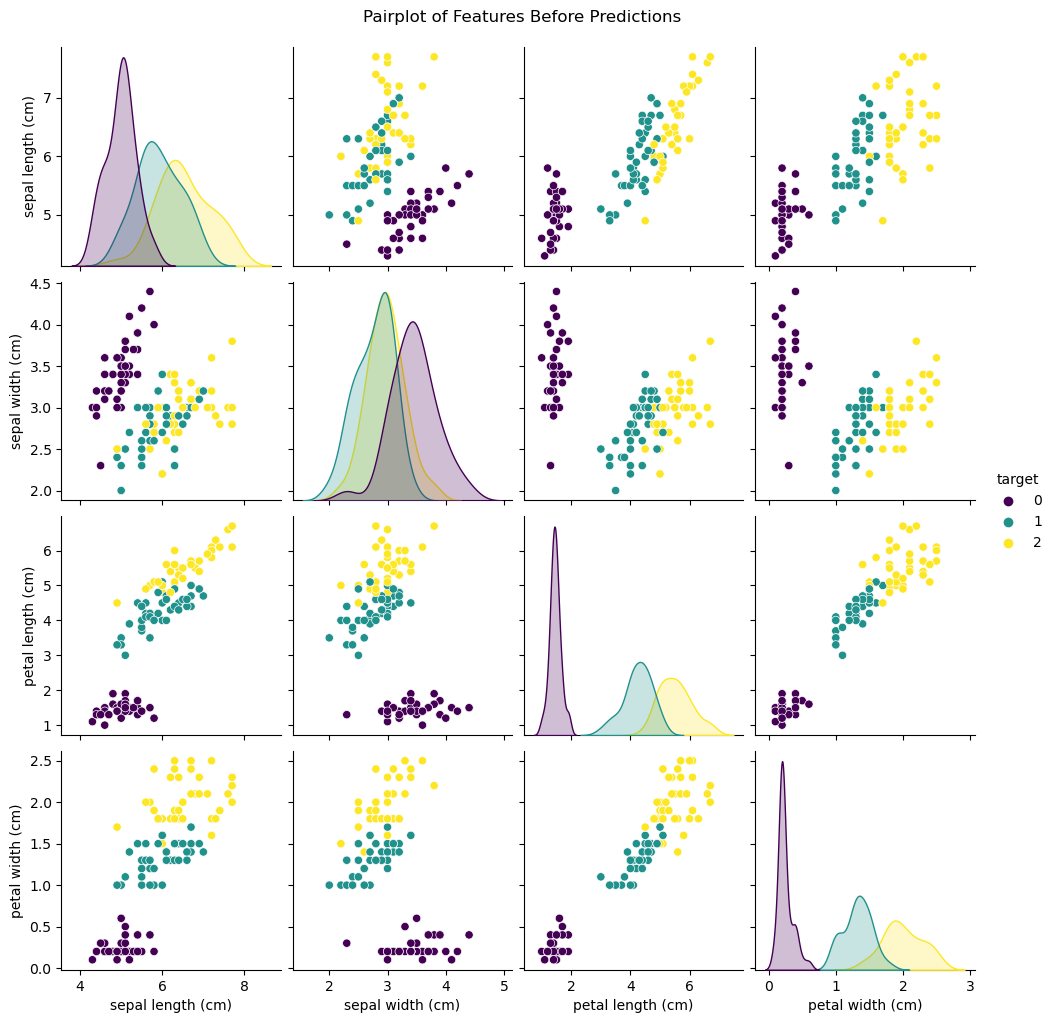

In [59]:
# Pairplot to visualize the distribution and relationships between features
sns.pairplot(iris_df_visualize, hue='target', palette='viridis')
plt.suptitle('Pairplot of Features Before Predictions', y=1.02)
plt.show()


### Create and Train the KNN Model
Instantiate the KNN classifier and train it using the training data.

In [31]:
Knn_model = KNeighborsClassifier(n_neighbors = 3)
Knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Make Predictions
Use the trained model to make predictions on the test set.

In [61]:
y_pred = Knn_model.predict(X_test)

### Predict and Visualize Data After Predictions

In [63]:
# Make predictions on the training set
y_train_pred = Knn_model.predict(X_train)

# Add predicted labels to the DataFrame
iris_df_visualize['predicted_target'] = y_train_pred



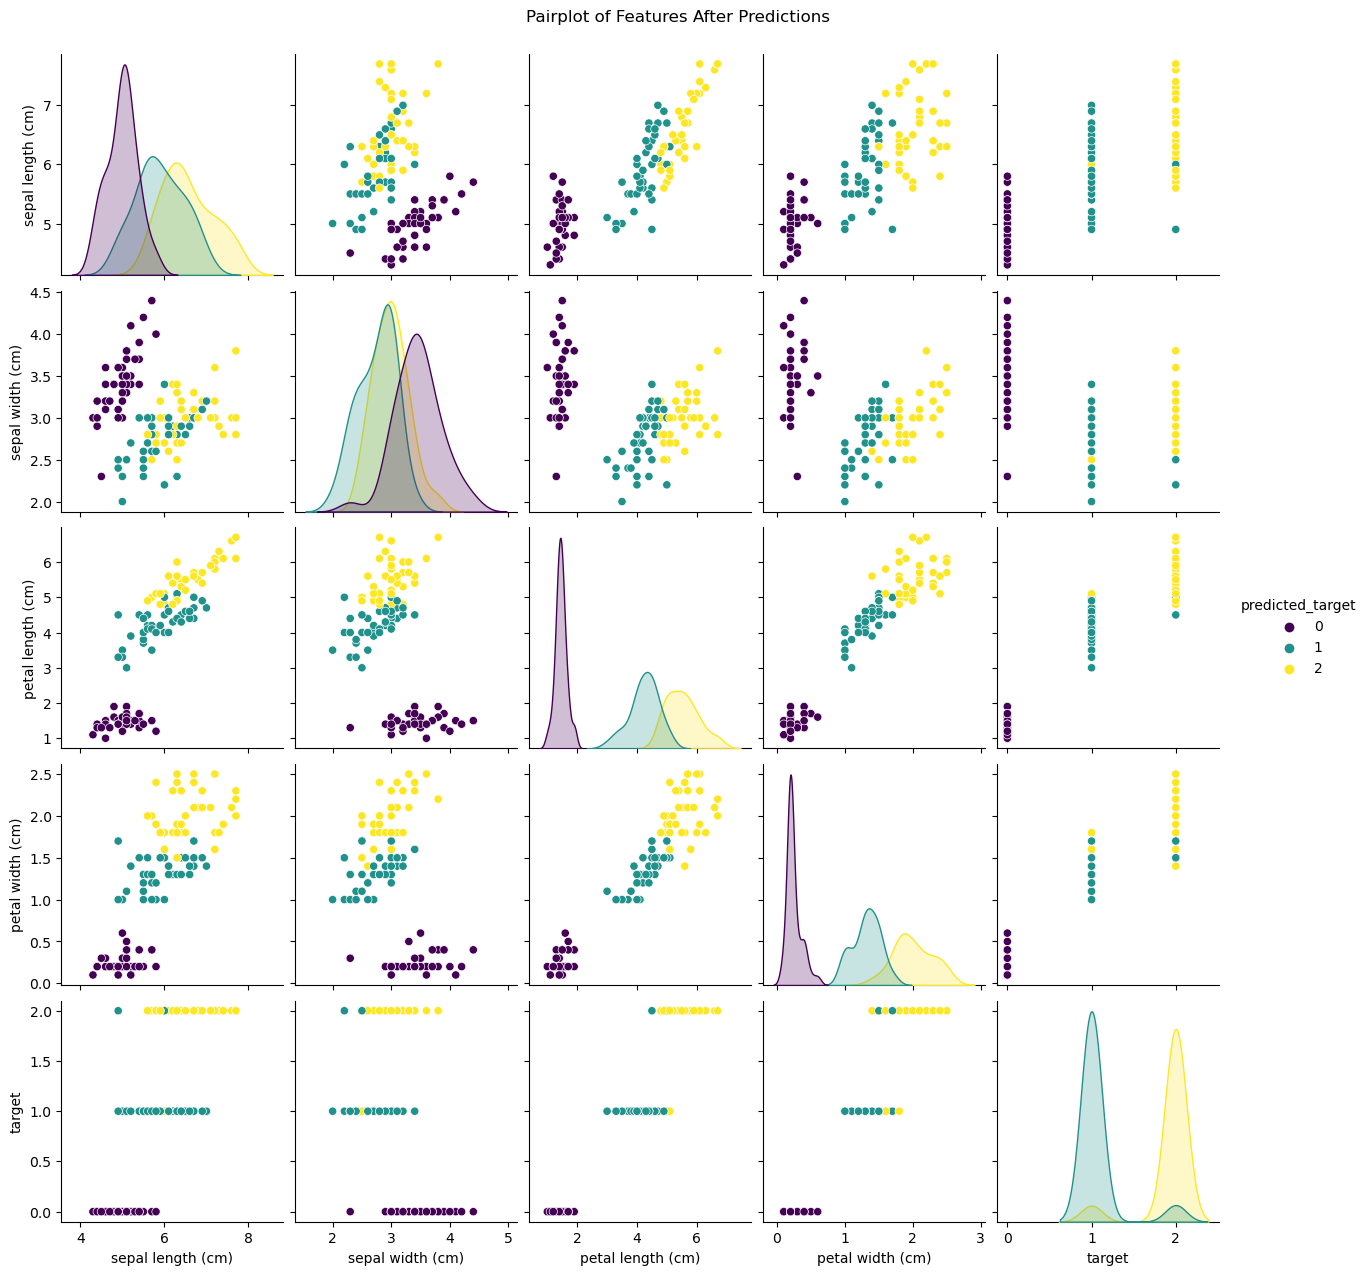

In [64]:
# Pairplot to visualize the distribution and relationships with predicted labels
sns.pairplot(iris_df_visualize, hue='predicted_target', palette='viridis')
plt.suptitle('Pairplot of Features After Predictions', y=1.02)
plt.show()


### Evaluate the Model
Evaluate the performance of the KNN model using metrics like accuracy, confusion matrix, and classification report.

In [35]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 1.00


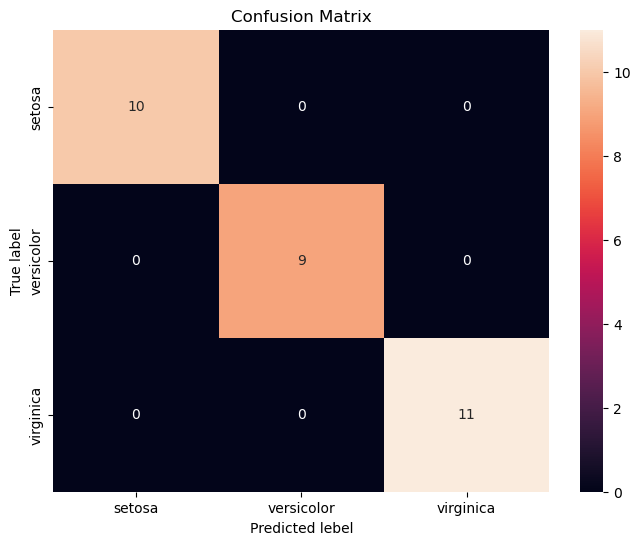

In [44]:
# Display confusion matrix using the heatmap 
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize= (8,6))
sns.heatmap(conf_matrix, annot = True, fmt = "d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted lebel")
plt.ylabel("True label")
plt.show()

In [37]:
# Display classification report
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

